In [1]:
import pandas as pd
# Read the CSV files into DataFrames
df1 = pd.read_csv('nodes.csv')
df2 = pd.read_csv('edges3.csv')

# Optionally, display the first few rows of each DataFrame to verify they're loaded correctly
print("First few rows of df1:")
df1


First few rows of df1:


,v_id,lon,lat,typ,voltage,degree_centrality,pagerank,betweenness,combined_centrality,criticality_label
0,1,9.522576,52.360409,substation,220000.0,0.002092,0.001128,0.000000,0.000277,Low
1,2,9.113210,52.543853,substation,220000.0,0.010460,0.002766,0.000197,0.001358,Severe
2,3,9.389745,52.026313,substation,380000.0,0.010460,0.002086,0.000171,0.001290,Severe
3,4,9.125265,52.538264,substation,380000.0,0.010460,0.002402,0.000395,0.001499,Severe
4,5,10.366275,52.284647,substation,380000.0,0.016736,0.002086,0.000110,0.001843,Severe
...,...,...,...,...,...,...,...,...,...,...
474,475,8.872260,50.129725,substation,110000.0,0.002092,0.001128,0.000000,0.000277,Low
475,476,8.743261,50.162338,auxillary_T_node,220000.0,0.006276,0.003523,0.000000,0.000841,High
476,477,7.957537,47.572159,substation,220000.0,0.002092,0.001128,0.000000,0.000277,Low
477,478,7.958491,47.579148,generator,380000.0,0.002092,0.001128,0.000000,0.000277,Low


In [2]:
print("\nFirst few rows of df2:")
df2.info()


First few rows of df2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   l_id      765 non-null    float64
 1   v_id_1    765 non-null    float64
 2   v_id_2    765 non-null    float64
 3   voltage   765 non-null    float64
 4   cables    765 non-null    float64
 5   wires     765 non-null    float64
 6   length_m  765 non-null    float64
 7   r         765 non-null    float64
 8   x         765 non-null    float64
 9   c         765 non-null    float64
 10  i_th_max  765 non-null    float64
dtypes: float64(11)
memory usage: 65.9 KB


In [3]:
pip install networkx

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges from df2
for idx, row in df2.iterrows():
    G.add_edge(row['v_id_1'], row['v_id_2'], weight=row['voltage'], id=row['l_id'])



In [5]:
# Number of nodes
num_nodes = G.number_of_nodes()
print(f"Number of nodes: {num_nodes}")

# Number of edges
num_edges = G.number_of_edges()
print(f"Number of edges: {num_edges}")

# Find weakly connected components and their sizes
weakly_connected_components = nx.weakly_connected_components(G)
component_sizes = [len(c) for c in weakly_connected_components]

# Print sizes of weakly connected components
print("Sizes of weakly connected components:", component_sizes)


Number of nodes: 479
Number of edges: 633
Sizes of weakly connected components: [469, 4, 2, 2, 2]


In [6]:
eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')
closeness_centrality = nx.closeness_centrality(G)
clustering_coefficient = nx.clustering(G)


In [7]:
df1['eigen_centrality'] = df1['v_id'].apply(lambda x: eigen_centrality.get(x, 0))
df1['closeness_centrality'] = df1['v_id'].apply(lambda x: closeness_centrality.get(x, 0))
df1['clustering_coefficient'] = df1['v_id'].apply(lambda x: clustering_coefficient.get(x, 0))


In [8]:
df1

,v_id,lon,lat,typ,voltage,degree_centrality,pagerank,betweenness,combined_centrality,criticality_label,eigen_centrality,closeness_centrality,clustering_coefficient
0,1,9.522576,52.360409,substation,220000.0,0.002092,0.001128,0.000000,0.000277,Low,9.305167e-51,0.000000,0.00
1,2,9.113210,52.543853,substation,220000.0,0.010460,0.002766,0.000197,0.001358,Severe,1.838136e-31,0.006834,0.05
2,3,9.389745,52.026313,substation,380000.0,0.010460,0.002086,0.000171,0.001290,Severe,7.071928e-44,0.004184,0.05
3,4,9.125265,52.538264,substation,380000.0,0.010460,0.002402,0.000395,0.001499,Severe,1.813950e-37,0.006538,0.00
4,5,10.366275,52.284647,substation,380000.0,0.016736,0.002086,0.000110,0.001843,Severe,7.071928e-44,0.004184,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,475,8.872260,50.129725,substation,110000.0,0.002092,0.001128,0.000000,0.000277,Low,9.305167e-51,0.000000,0.00
475,476,8.743261,50.162338,auxillary_T_node,220000.0,0.006276,0.003523,0.000000,0.000841,High,6.141411e-44,0.006276,0.00
476,477,7.957537,47.572159,substation,220000.0,0.002092,0.001128,0.000000,0.000277,Low,9.305167e-51,0.000000,0.00
477,478,7.958491,47.579148,generator,380000.0,0.002092,0.001128,0.000000,0.000277,Low,9.305167e-51,0.000000,0.00


In [9]:
load_centrality = nx.load_centrality(G)
# Calculate the average shortest path length for each node
avg_shortest_path_length = {}
for node in G.nodes():
    path_lengths = nx.single_source_shortest_path_length(G, node)
    avg_length = sum(path_lengths.values()) / len(path_lengths)
    avg_shortest_path_length[node] = avg_length
average_neighbor_degree = nx.average_neighbor_degree(G)
# Initialize a dictionary to store node strength
node_strength = {node: 0 for node in G.nodes()}

# Sum up the weights of the edges for each node
for node in G.nodes():
    # Sum weights of outgoing edges
    node_strength[node] += sum(data['weight'] for _, _, data in G.edges(node, data=True))
    # If it's a directed graph, also sum weights of incoming edges
    if isinstance(G, nx.DiGraph):
        node_strength[node] += sum(data['weight'] for _, _, data in G.in_edges(node, data=True))
df1['load_centrality'] = df1['v_id'].apply(lambda x: load_centrality.get(x, 0))
df1['avg_shortest_path_length'] = df1['v_id'].apply(lambda x: avg_shortest_path_length.get(x, float('inf')))
df1['average_neighbor_degree'] = df1['v_id'].apply(lambda x: average_neighbor_degree.get(x, 0))
df1['node_strength'] = df1['v_id'].apply(lambda x: node_strength.get(x, 0))

In [10]:
df1

,v_id,lon,lat,typ,voltage,degree_centrality,pagerank,betweenness,combined_centrality,criticality_label,eigen_centrality,closeness_centrality,clustering_coefficient,load_centrality,avg_shortest_path_length,average_neighbor_degree,node_strength
0,1,9.522576,52.360409,substation,220000.0,0.002092,0.001128,0.000000,0.000277,Low,9.305167e-51,0.000000,0.00,0.000000,2.222222,3.000000,220000.0
1,2,9.113210,52.543853,substation,220000.0,0.010460,0.002766,0.000197,0.001358,Severe,1.838136e-31,0.006834,0.05,0.000197,1.500000,1.333333,1260000.0
2,3,9.389745,52.026313,substation,380000.0,0.010460,0.002086,0.000171,0.001290,Severe,7.071928e-44,0.004184,0.05,0.000171,3.000000,1.000000,1900000.0
3,4,9.125265,52.538264,substation,380000.0,0.010460,0.002402,0.000395,0.001499,Severe,1.813950e-37,0.006538,0.00,0.000395,2.350000,2.000000,1900000.0
4,5,10.366275,52.284647,substation,380000.0,0.016736,0.002086,0.000110,0.001843,Severe,7.071928e-44,0.004184,0.00,0.000110,1.500000,1.333333,2400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,475,8.872260,50.129725,substation,110000.0,0.002092,0.001128,0.000000,0.000277,Low,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0
475,476,8.743261,50.162338,auxillary_T_node,220000.0,0.006276,0.003523,0.000000,0.000841,High,6.141411e-44,0.006276,0.00,0.000000,0.000000,0.000000,660000.0
476,477,7.957537,47.572159,substation,220000.0,0.002092,0.001128,0.000000,0.000277,Low,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0
477,478,7.958491,47.579148,generator,380000.0,0.002092,0.001128,0.000000,0.000277,Low,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0


In [11]:
df1.to_excel("node3_final.xlsx", index=False)

In [12]:
df_clm = df1.drop(['pagerank', 'degree_centrality', 'betweenness', 'combined_centrality'], axis=1)

In [13]:
df_clm

,v_id,lon,lat,typ,voltage,criticality_label,eigen_centrality,closeness_centrality,clustering_coefficient,load_centrality,avg_shortest_path_length,average_neighbor_degree,node_strength
0,1,9.522576,52.360409,substation,220000.0,Low,9.305167e-51,0.000000,0.00,0.000000,2.222222,3.000000,220000.0
1,2,9.113210,52.543853,substation,220000.0,Severe,1.838136e-31,0.006834,0.05,0.000197,1.500000,1.333333,1260000.0
2,3,9.389745,52.026313,substation,380000.0,Severe,7.071928e-44,0.004184,0.05,0.000171,3.000000,1.000000,1900000.0
3,4,9.125265,52.538264,substation,380000.0,Severe,1.813950e-37,0.006538,0.00,0.000395,2.350000,2.000000,1900000.0
4,5,10.366275,52.284647,substation,380000.0,Severe,7.071928e-44,0.004184,0.00,0.000110,1.500000,1.333333,2400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,475,8.872260,50.129725,substation,110000.0,Low,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0
475,476,8.743261,50.162338,auxillary_T_node,220000.0,High,6.141411e-44,0.006276,0.00,0.000000,0.000000,0.000000,660000.0
476,477,7.957537,47.572159,substation,220000.0,Low,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0
477,478,7.958491,47.579148,generator,380000.0,Low,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0


In [14]:
cols = [col for col in df_clm.columns if col != 'criticality_label']
cols.append('criticality_label')
df_clm = df_clm[cols]

In [15]:
df_clm

,v_id,lon,lat,typ,voltage,eigen_centrality,closeness_centrality,clustering_coefficient,load_centrality,avg_shortest_path_length,average_neighbor_degree,node_strength,criticality_label
0,1,9.522576,52.360409,substation,220000.0,9.305167e-51,0.000000,0.00,0.000000,2.222222,3.000000,220000.0,Low
1,2,9.113210,52.543853,substation,220000.0,1.838136e-31,0.006834,0.05,0.000197,1.500000,1.333333,1260000.0,Severe
2,3,9.389745,52.026313,substation,380000.0,7.071928e-44,0.004184,0.05,0.000171,3.000000,1.000000,1900000.0,Severe
3,4,9.125265,52.538264,substation,380000.0,1.813950e-37,0.006538,0.00,0.000395,2.350000,2.000000,1900000.0,Severe
4,5,10.366275,52.284647,substation,380000.0,7.071928e-44,0.004184,0.00,0.000110,1.500000,1.333333,2400000.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,475,8.872260,50.129725,substation,110000.0,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0,Low
475,476,8.743261,50.162338,auxillary_T_node,220000.0,6.141411e-44,0.006276,0.00,0.000000,0.000000,0.000000,660000.0,High
476,477,7.957537,47.572159,substation,220000.0,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0,Low
477,478,7.958491,47.579148,generator,380000.0,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0,Low


In [16]:
df_clm.to_excel("node3_cml.xlsx", index=False)

In [17]:
df_clm

,v_id,lon,lat,typ,voltage,eigen_centrality,closeness_centrality,clustering_coefficient,load_centrality,avg_shortest_path_length,average_neighbor_degree,node_strength,criticality_label
0,1,9.522576,52.360409,substation,220000.0,9.305167e-51,0.000000,0.00,0.000000,2.222222,3.000000,220000.0,Low
1,2,9.113210,52.543853,substation,220000.0,1.838136e-31,0.006834,0.05,0.000197,1.500000,1.333333,1260000.0,Severe
2,3,9.389745,52.026313,substation,380000.0,7.071928e-44,0.004184,0.05,0.000171,3.000000,1.000000,1900000.0,Severe
3,4,9.125265,52.538264,substation,380000.0,1.813950e-37,0.006538,0.00,0.000395,2.350000,2.000000,1900000.0,Severe
4,5,10.366275,52.284647,substation,380000.0,7.071928e-44,0.004184,0.00,0.000110,1.500000,1.333333,2400000.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,475,8.872260,50.129725,substation,110000.0,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0,Low
475,476,8.743261,50.162338,auxillary_T_node,220000.0,6.141411e-44,0.006276,0.00,0.000000,0.000000,0.000000,660000.0,High
476,477,7.957537,47.572159,substation,220000.0,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0,Low
477,478,7.958491,47.579148,generator,380000.0,9.305167e-51,0.000000,0.00,0.000000,0.500000,0.000000,220000.0,Low


In [18]:
from sklearn.preprocessing import OneHotEncoder

# Reshape the 'typ' column to a 2D array for OneHotEncoder
typ_array = df_clm[['typ']].values

# Create the encoder
encoder = OneHotEncoder(sparse=False)
typ_encoded = encoder.fit_transform(typ_array)

# Convert the encoded data into a DataFrame
typ_encoded_df = pd.DataFrame(typ_encoded, columns=encoder.get_feature_names_out(['typ']))

# Concatenate the encoded df with the original df
df_clm = pd.concat([df_clm.reset_index(drop=True), typ_encoded_df], axis=1)

# Drop the original 'typ' column
df_clm.drop('typ', axis=1, inplace=True)

/Users/mmishkaturrahman/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
#Encode the Target Variable
#Use LabelEncoder to convert the criticality_label into numerical format:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_clm['criticality_label'] = label_encoder.fit_transform(df_clm['criticality_label'])

In [20]:
#Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

# List of numerical columns (exclude 'v_id' and 'criticality_label')
num_cols = ['lon', 'lat', 'voltage', 'eigen_centrality', 'closeness_centrality', 
            'clustering_coefficient', 'load_centrality', 'avg_shortest_path_length', 
            'average_neighbor_degree', 'node_strength']

scaler = StandardScaler()
df_clm[num_cols] = scaler.fit_transform(df_clm[num_cols])

In [21]:
#Splitting the Data
from sklearn.model_selection import train_test_split

X = df_clm.drop('criticality_label', axis=1)
y = df_clm['criticality_label']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [22]:
#Model Training
%pip install xgboost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [23]:
#Multilayer perceptron
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=1000, random_state=42)
mlp_clf.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [24]:
#SVM
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [25]:
from sklearn.metrics import accuracy_score

# Evaluate XGBoost
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Evaluate MLP
y_pred_mlp = mlp_clf.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Evaluate SVM
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"MLP Accuracy: {accuracy_mlp}")
print(f"SVM Accuracy: {accuracy_svm}")

XGBoost Accuracy: 0.8263888888888888
MLP Accuracy: 0.6875
SVM Accuracy: 0.3611111111111111


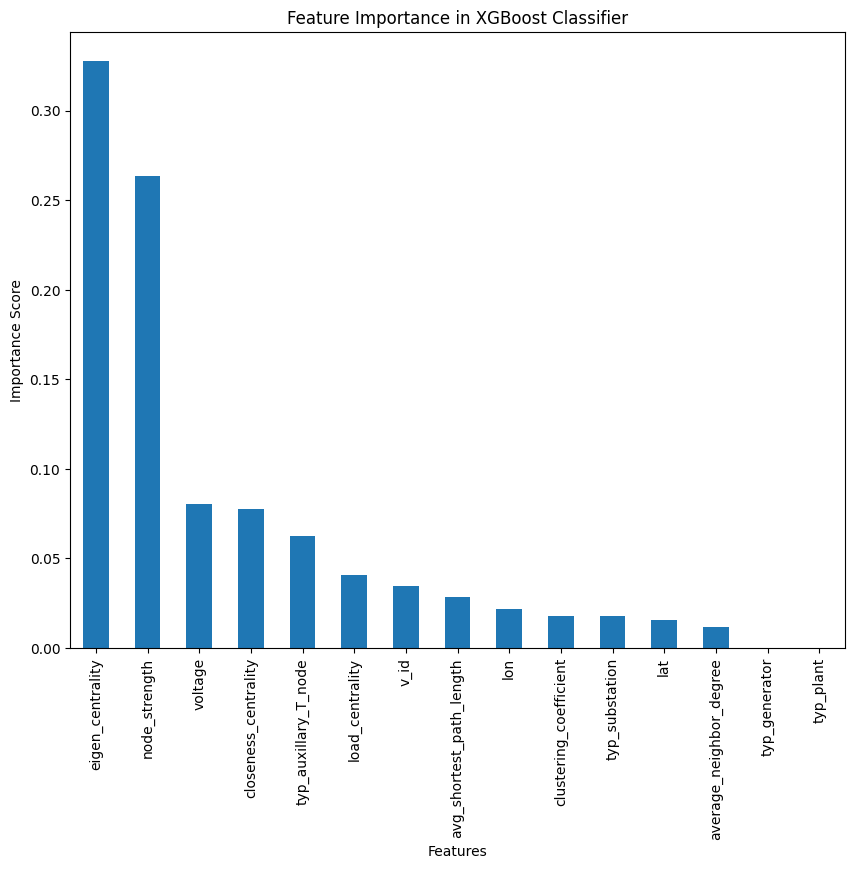

In [30]:
#Assess Feature Importance with XGBoost

import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
xgb_feature_importances = xgb_clf.feature_importances_

# Create a pandas series to hold the feature importances
features = pd.Series(xgb_feature_importances, index=X_train.columns)

# Plot the feature importances
plt.figure(figsize=(10, 8))
features.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance in XGBoost Classifier')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()



In [34]:
# Assuming X_train is a pandas DataFrame with column names
feature_importances = xgb_clf.feature_importances_
feature_names = X_train.columns
importances = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

print("Feature Importances:")
print(importances)

Feature Importances:
eigen_centrality            0.327468
node_strength               0.263645
voltage                     0.080253
closeness_centrality        0.077640
typ_auxillary_T_node        0.062690
load_centrality             0.040499
v_id                        0.034389
avg_shortest_path_length    0.028571
lon                         0.021662
clustering_coefficient      0.017912
typ_substation              0.017727
lat                         0.015838
average_neighbor_degree     0.011705
typ_generator               0.000000
typ_plant                   0.000000
dtype: float32


In [26]:
#Cross Validation
from sklearn.model_selection import GridSearchCV

In [27]:
#Define Hyperparameter
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

In [28]:
#Run Grid Search CV
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=1000), mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [29]:
#Evaluate best Model
# Best estimator accuracy for XGBoost
best_xgb = xgb_grid_search.best_estimator_
best_xgb_accuracy = accuracy_score(y_test, best_xgb.predict(X_test))

# Best estimator accuracy for MLP
best_mlp = mlp_grid_search.best_estimator_
best_mlp_accuracy = accuracy_score(y_test, best_mlp.predict(X_test))

# Best estimator accuracy for SVM
best_svm = svm_grid_search.best_estimator_
best_svm_accuracy = accuracy_score(y_test, best_svm.predict(X_test))

print(f"Best XGBoost Accuracy: {best_xgb_accuracy}")
print(f"Best MLP Accuracy: {best_mlp_accuracy}")
print(f"Best SVM Accuracy: {best_svm_accuracy}")

Best XGBoost Accuracy: 0.8472222222222222
Best MLP Accuracy: 0.7986111111111112
Best SVM Accuracy: 0.8333333333333334


In [45]:
# Best parameters and accuracy for XGBoost
best_xgb_params = xgb_grid_search.best_params_
best_xgb_accuracy = accuracy_score(y_test, best_xgb.predict(X_test))
print(f"Best XGBoost Parameters: {best_xgb_params}")
print(f"Best XGBoost Accuracy: {best_xgb_accuracy}")
# Best parameters and accuracy for MLP
best_mlp_params = mlp_grid_search.best_params_
best_mlp_accuracy = accuracy_score(y_test, best_mlp.predict(X_test))
print(f"Best MLP Parameters: {best_mlp_params}")
print(f"Best MLP Accuracy: {best_mlp_accuracy}")
# Best parameters and accuracy for SVM
best_svm_params = svm_grid_search.best_params_
best_svm_accuracy = accuracy_score(y_test, best_svm.predict(X_test))
print(f"Best SVM Parameters: {best_svm_params}")
print(f"Best SVM Accuracy: {best_svm_accuracy}")

Best XGBoost Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}
Best XGBoost Accuracy: 0.8472222222222222
Best MLP Parameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best MLP Accuracy: 0.7916666666666666
Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 0.8333333333333334
